In [1]:
import cptac
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [16]:
print("OPTIONS")
print(cptac.get_source_options())

OPTIONS
                                                                           Cancer
Source     Datatype                                                              
bcm        CNV                  [ov, coad, gbm, pdac, ucec, ccrcc, lscc, luad,...
           circular_RNA               [gbm, pdac, ucec, ccrcc, lscc, hnscc, luad]
           miRNA                [coad, gbm, pdac, ucec, ccrcc, lscc, hnscc, lu...
           phosphoproteomics    [ov, coad, gbm, pdac, ucec, ccrcc, lscc, hnscc...
           proteomics           [ov, ucec, coad, gbm, pdac, ccrcc, lscc, hnscc...
           transcriptomics      [ov, ucec, coad, gbm, pdac, ccrcc, lscc, hnscc...
broad      transcriptomics      [ov, coad, gbm, pdac, ucec, ccrcc, lscc, hnscc...
harmonized ancestry_prediction                                      [all_cancers]
           somatic_mutation                                         [all_cancers]
mssm       clinical                                                 [all_cancers]
umich   

In [6]:
def Check_CNV_Status(cnv_val):
    if ((cnv_val > 0.2) | (cnv_val < -0.2)):
        return 1
    else:
        return 0

In [33]:
def Get_RNA_Protein_Correlation(cancer_type,accessor,protein):
    transcriptomics = accessor.get_transcriptomics('bcm')
    proteomics = accessor.get_proteomics('umich')

    if (protein in proteomics) & (protein in transcriptomics):
        RNA_dat = transcriptomics[protein]
        protein_dat = proteomics[protein]
    else:
        print("+++++++++++++++++++++++++++")
        print("No " + protein + " data available for " + cancer_type)
        print("+++++++++++++++++++++++++++")
        return


    RNA_protein = protein_dat.join(RNA_dat)
    RNA_protein = RNA_protein.rename(columns={RNA_protein.columns[0]:'Protein_Expression',RNA_protein.columns[1]:'RNA_Level'}).dropna()

    plt.scatter(RNA_protein['Protein_Expression'],RNA_protein['RNA_Level'])
    plt.title('Correlation between '+ protein +' Protein Expression and RNA Levels in '+ cancer_type)
    plt.xlabel(protein +' Expression')
    plt.ylabel('RNA Level')
    plt.show()

    corr, _ = pearsonr(RNA_protein['Protein_Expression'],RNA_protein['RNA_Level'])
    print('For '+protein+' in '+cancer_type+':')
    print('Pearsons correlation: %.3f' % corr)
    
    print(_)

In [14]:
def Get_CNV_Protein_Correlation(cancer_type,accessor,protein):
    cnv_orig = accessor.get_CNV('washu')
    proteomics = accessor.get_proteomics('umich')

    cnv_dat = cnv_orig.map(Check_CNV_Status)
    if protein in proteomics:
        protein_dat = proteomics[protein]
    else:
        print("+++++++++++++++++++++++++++")
        print("No " + protein + " data available for " + cancer_type)
        print("+++++++++++++++++++++++++++")
        return

    total_cnv = cnv_dat.sum(axis=1).to_frame()

    cnv_protein = protein_dat.join(total_cnv)
    cnv_protein = cnv_protein.rename(columns={cnv_protein.columns[0]:protein,cnv_protein.columns[1]:'CNV_Score'}).dropna()
    cnv_protein = cnv_protein.sort_values(by=['CNV_Score'])

    plt.scatter(cnv_protein[protein],cnv_protein['CNV_Score'])
    plt.title('Correlation between '+ protein +' and Total CNV Events in '+ cancer_type)
    plt.xlabel(protein +' Expression')
    plt.ylabel('# of CNV Events')
    plt.show()

    corr, _ = pearsonr(cnv_protein[protein],cnv_protein['CNV_Score'])
    print('For '+protein+' in '+cancer_type+':')
    print('Pearsons correlation: %.3f' % corr)
    
    print(_)

In [8]:
cancer_types = ['brca','ccrcc','coad','gbm','hnscc','lscc','luad','ov','pdac','ucec']
data_accessors = {'brca':cptac.Brca(),'ccrcc':cptac.Ccrcc(),'coad':cptac.Coad(),
                  'gbm':cptac.Gbm(),'hnscc':cptac.Hnscc(),'lscc':cptac.Lscc(),
                  'luad':cptac.Luad(),'ov':cptac.Ov(),'pdac':cptac.Pdac(),'ucec':cptac.Ucec()}

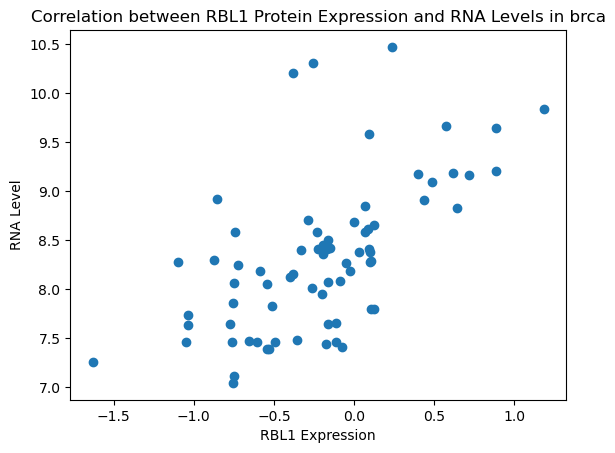

For RBL1 in brca:
Pearsons correlation: 0.607
1.5867685536705912e-08
+++++++++++++++++++++++++++
No RBL1 data available for ccrcc
+++++++++++++++++++++++++++
+++++++++++++++++++++++++++
No RBL1 data available for coad
+++++++++++++++++++++++++++


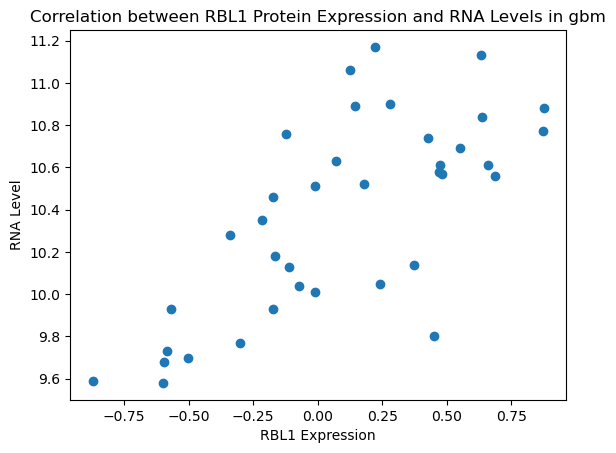

For RBL1 in gbm:
Pearsons correlation: 0.717
5.968008380626233e-07


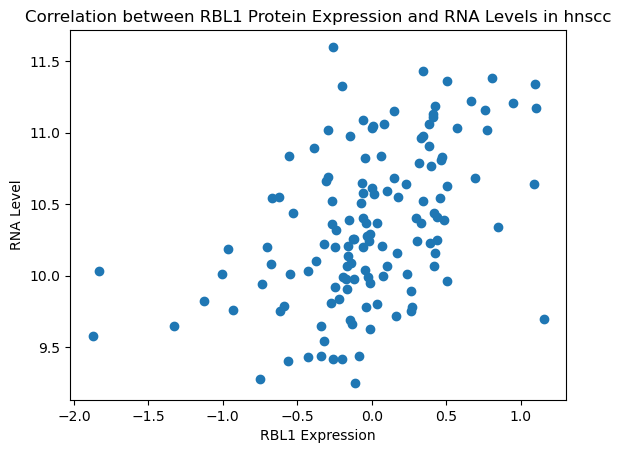

For RBL1 in hnscc:
Pearsons correlation: 0.470
9.970481535515134e-09


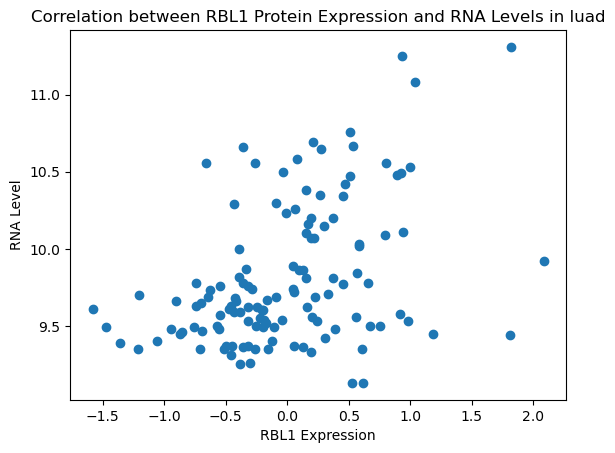

For RBL1 in luad:
Pearsons correlation: 0.412
1.6894453645839268e-06


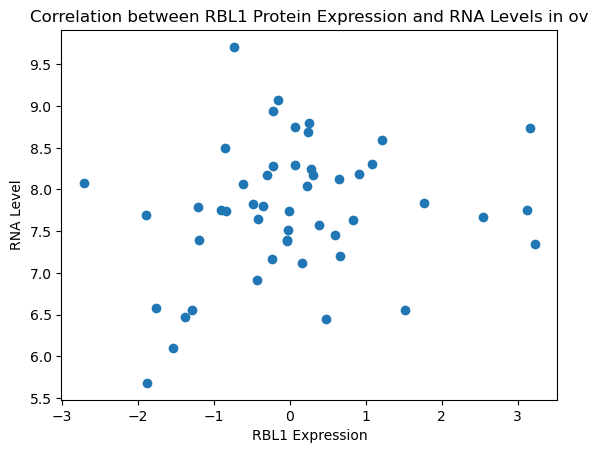

For RBL1 in ov:
Pearsons correlation: 0.214
0.1351503467971945


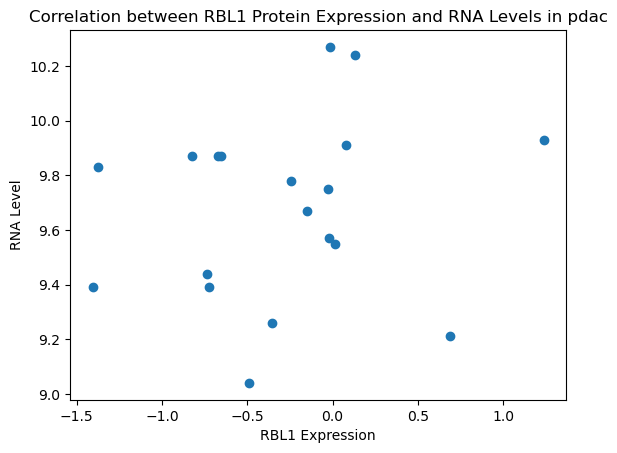

For RBL1 in pdac:
Pearsons correlation: 0.174
0.4763843736572688


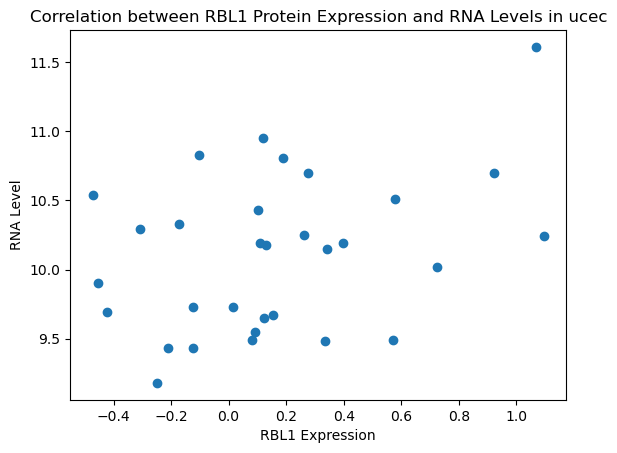

For RBL1 in ucec:
Pearsons correlation: 0.375
0.03760274667071061


In [38]:
protein = 'RBL1'
for accessor in data_accessors:
    if accessor != 'lscc':
        protein_clinical_dat = Get_RNA_Protein_Correlation(accessor,data_accessors[accessor],protein)

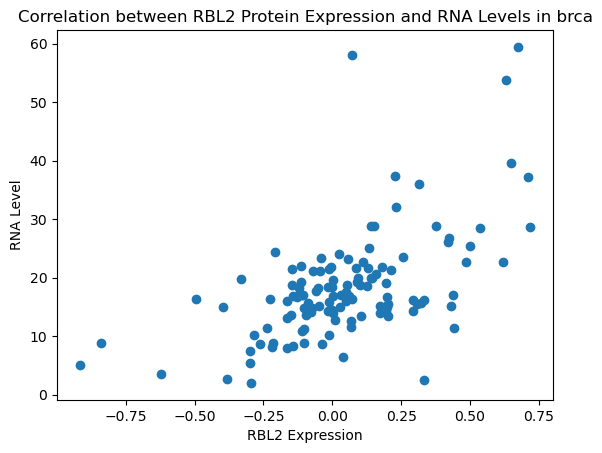

For RBL2 in brca:
Pearsons correlation: 0.577
4.127477872534299e-12


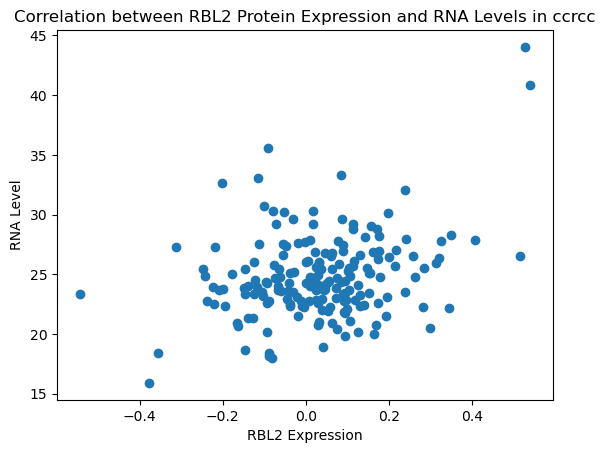

For RBL2 in ccrcc:
Pearsons correlation: 0.312
1.5712270409747723e-05


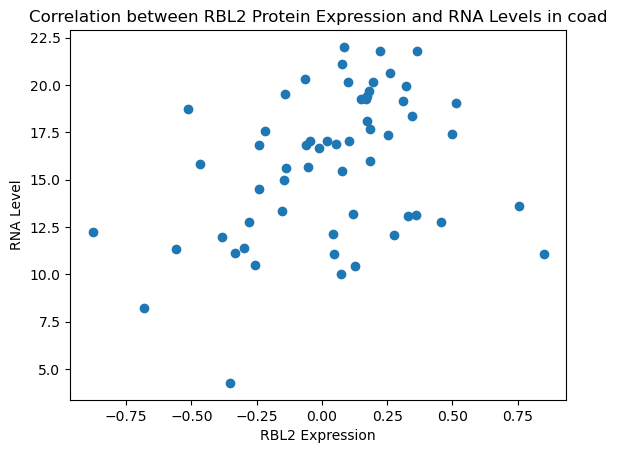

For RBL2 in coad:
Pearsons correlation: 0.331
0.011098325503214691


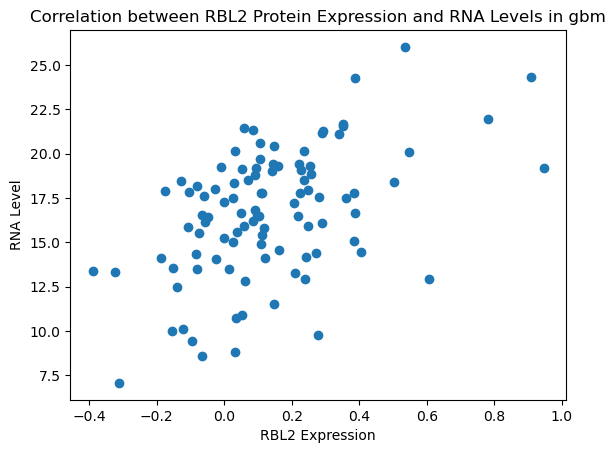

For RBL2 in gbm:
Pearsons correlation: 0.486
3.436652730112452e-07


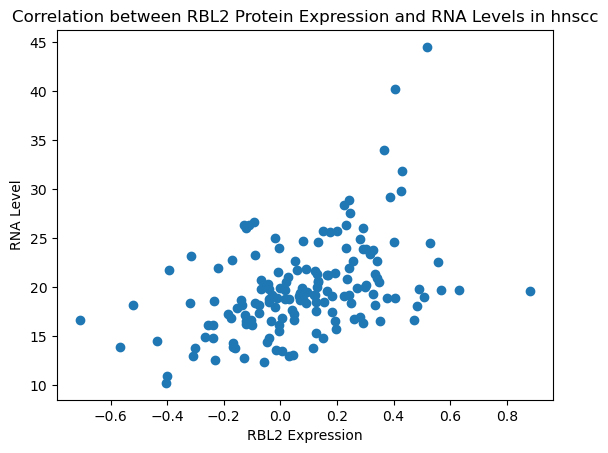

For RBL2 in hnscc:
Pearsons correlation: 0.449
2.8676629625550926e-09


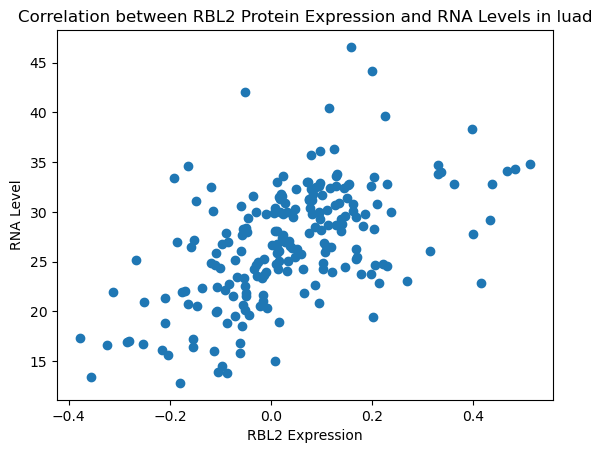

For RBL2 in luad:
Pearsons correlation: 0.550
4.1965492993856164e-18


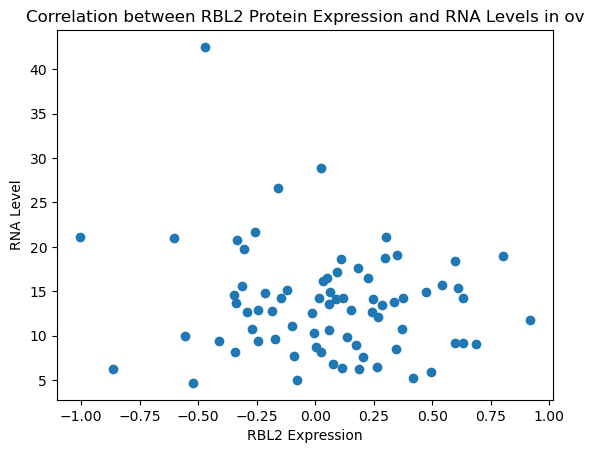

For RBL2 in ov:
Pearsons correlation: -0.138
0.2368365726636713


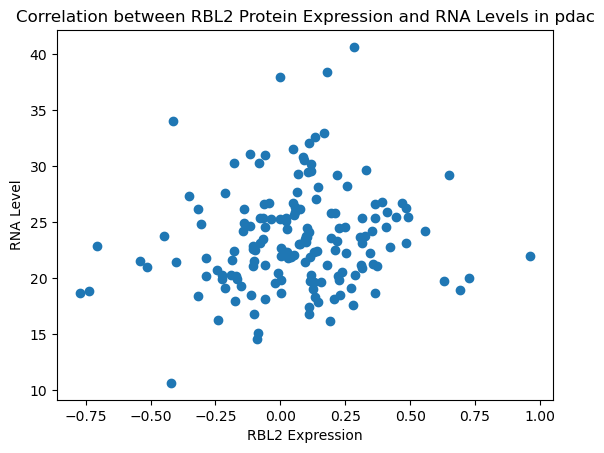

For RBL2 in pdac:
Pearsons correlation: 0.126
0.10968822022995331


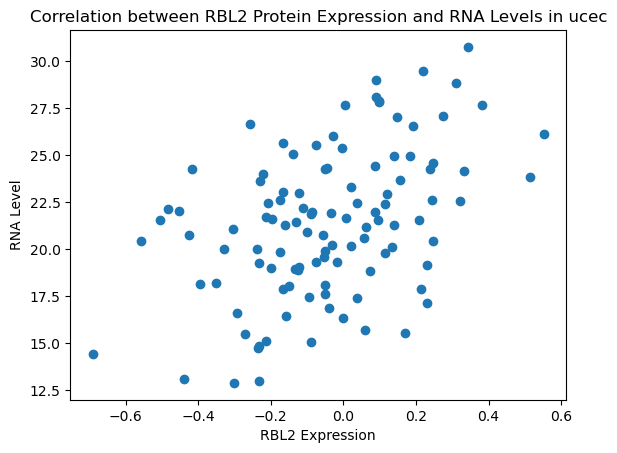

For RBL2 in ucec:
Pearsons correlation: 0.447
1.1038036830382658e-06


In [20]:
protein = 'RBL2'
for accessor in data_accessors:
    if accessor != 'lscc':
        protein_clinical_dat = Get_RNA_Protein_Correlation(accessor,data_accessors[accessor],protein)

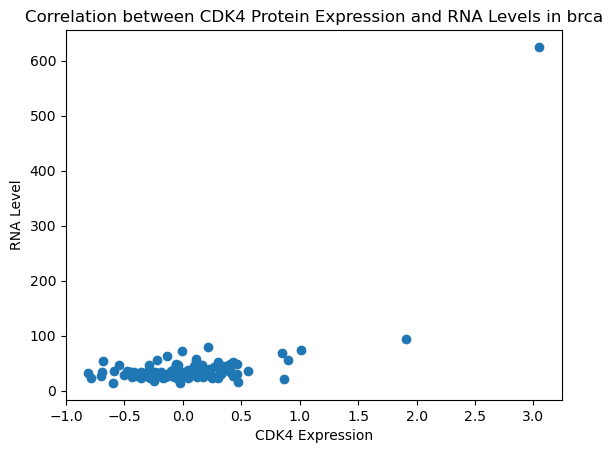

For CDK4 in brca:
Pearsons correlation: 0.657
2.7941982354227423e-16


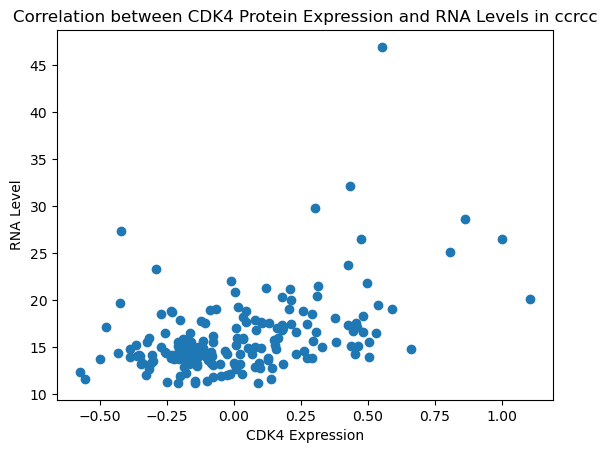

For CDK4 in ccrcc:
Pearsons correlation: 0.464
2.913532592904398e-11


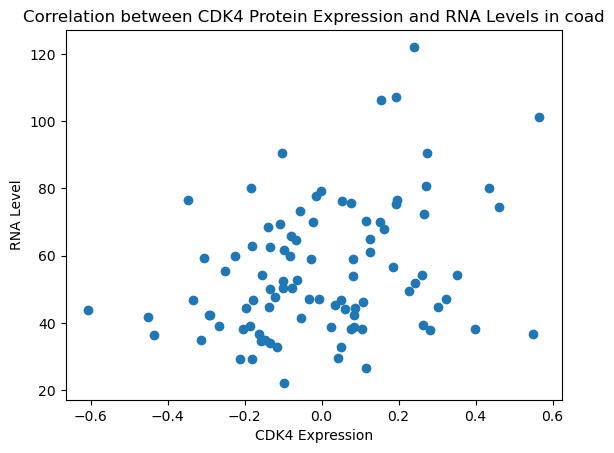

For CDK4 in coad:
Pearsons correlation: 0.320
0.0016603504532915552


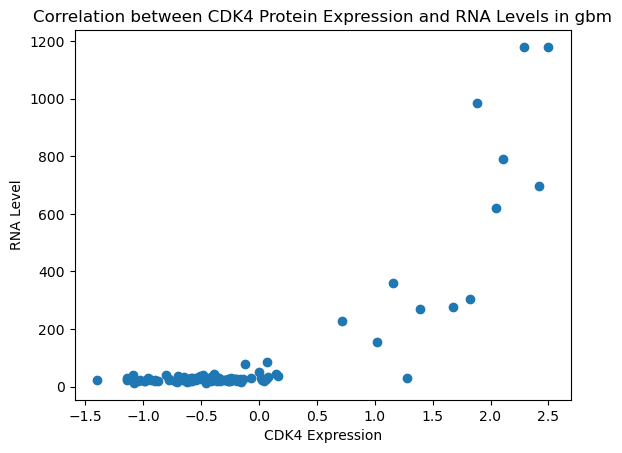

For CDK4 in gbm:
Pearsons correlation: 0.826
7.090738749813375e-26


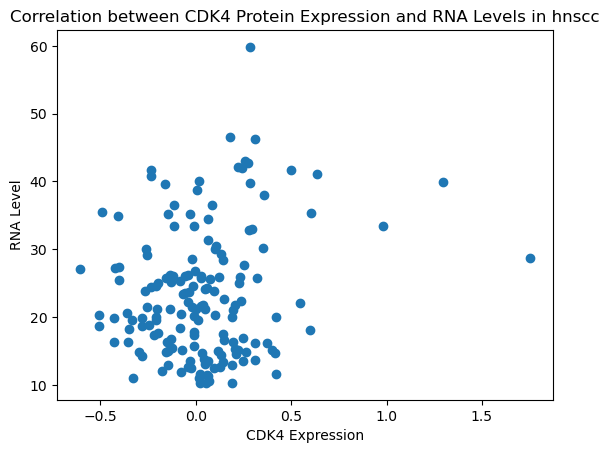

For CDK4 in hnscc:
Pearsons correlation: 0.185
0.019359851538426884


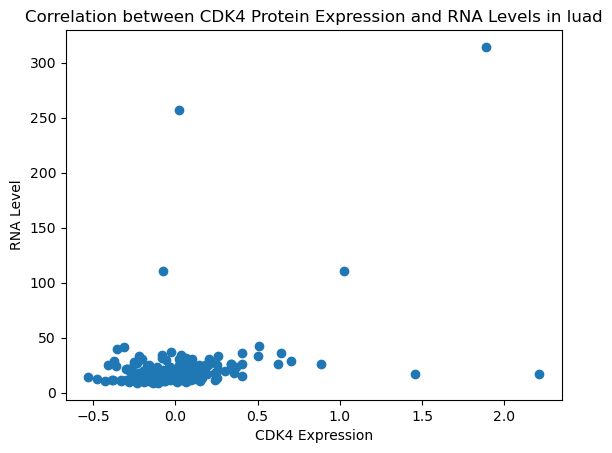

For CDK4 in luad:
Pearsons correlation: 0.400
1.6783067667178142e-09


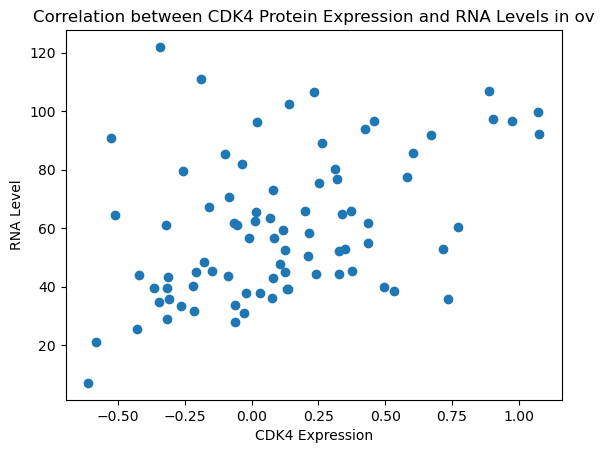

For CDK4 in ov:
Pearsons correlation: 0.420
8.460547448130058e-05


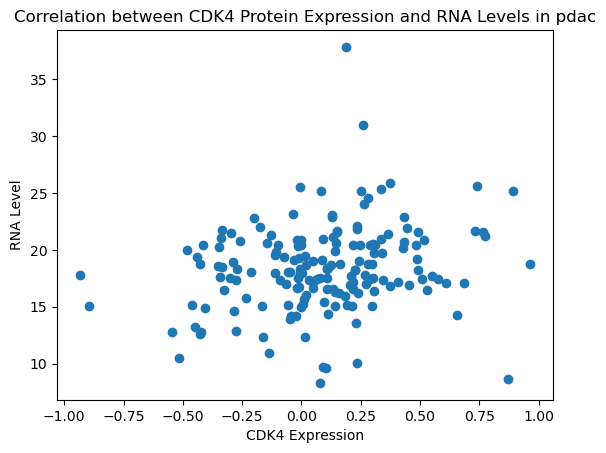

For CDK4 in pdac:
Pearsons correlation: 0.214
0.005118996397288625


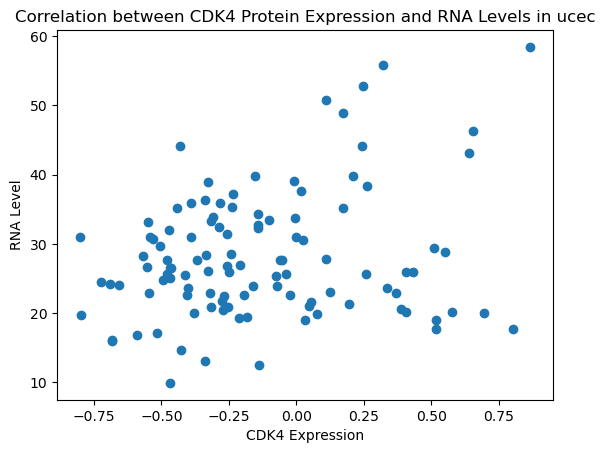

For CDK4 in ucec:
Pearsons correlation: 0.243
0.010888341799872681


In [23]:
protein = 'CDK4'
for accessor in data_accessors:
    if accessor != 'lscc':
        protein_clinical_dat = Get_RNA_Protein_Correlation(accessor,data_accessors[accessor],protein)

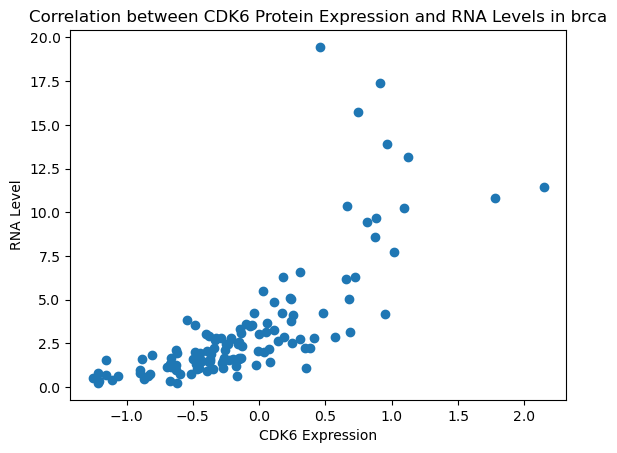

For CDK6 in brca:
Pearsons correlation: 0.744
1.5060897919401183e-22


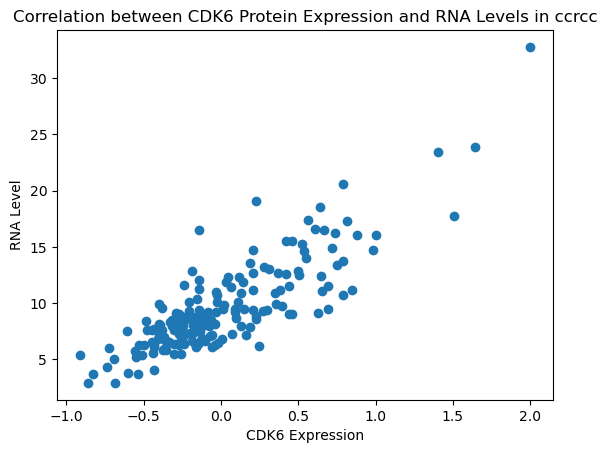

For CDK6 in ccrcc:
Pearsons correlation: 0.838
4.400063279314854e-50


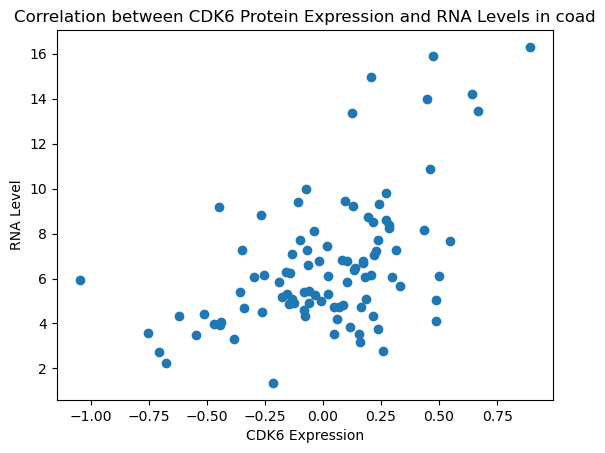

For CDK6 in coad:
Pearsons correlation: 0.526
3.740374731791906e-08


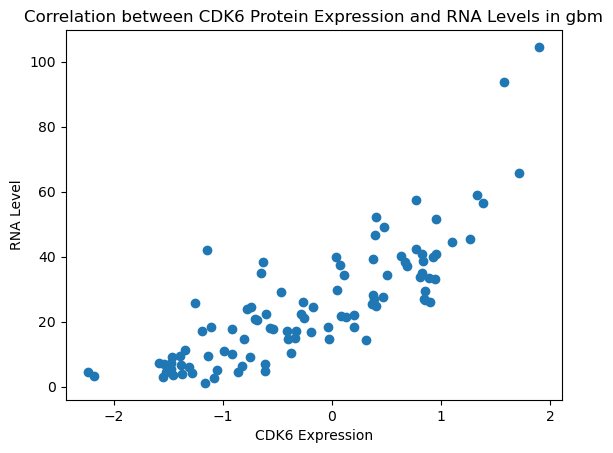

For CDK6 in gbm:
Pearsons correlation: 0.810
3.351737141097816e-24


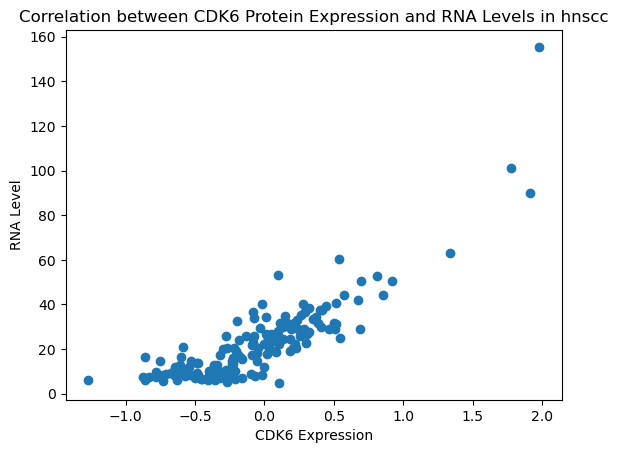

For CDK6 in hnscc:
Pearsons correlation: 0.851
7.492292737997375e-46


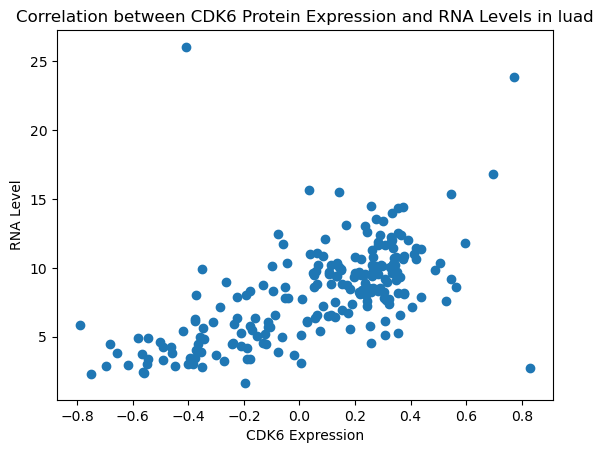

For CDK6 in luad:
Pearsons correlation: 0.601
4.2269518871601164e-22


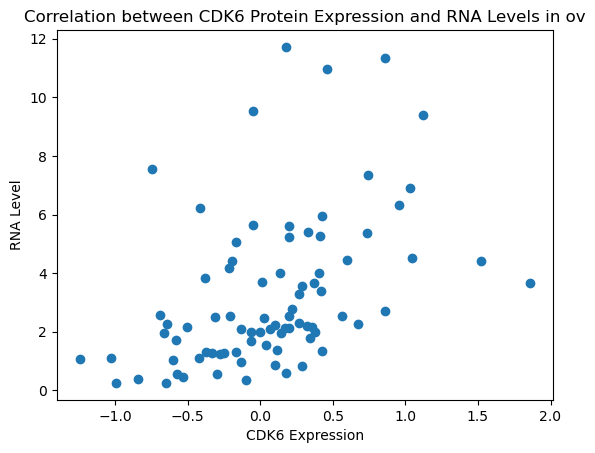

For CDK6 in ov:
Pearsons correlation: 0.440
3.576421418768617e-05


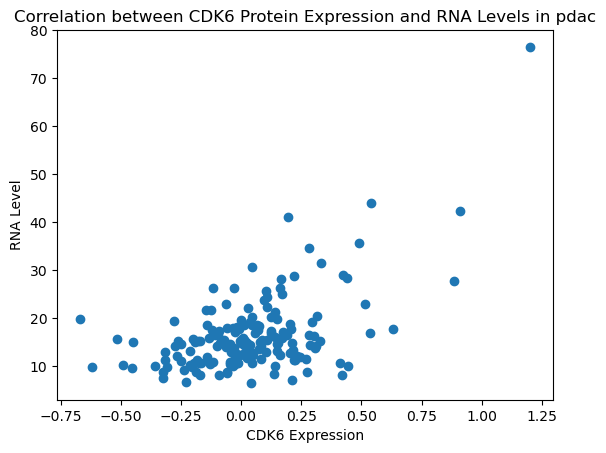

For CDK6 in pdac:
Pearsons correlation: 0.549
9.624039851127248e-15


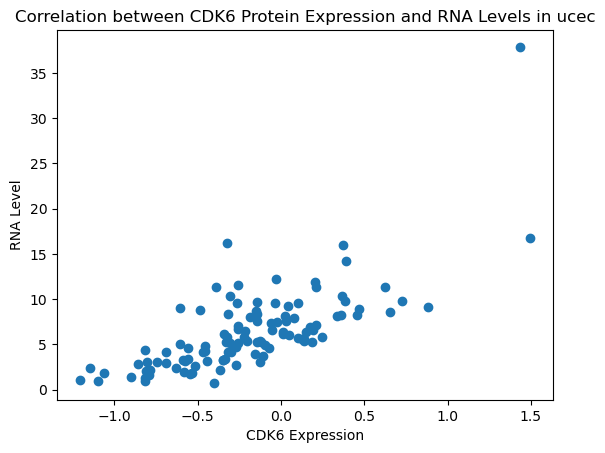

For CDK6 in ucec:
Pearsons correlation: 0.715
2.30195135763043e-18


In [24]:
protein = 'CDK6'
for accessor in data_accessors:
    if accessor != 'lscc':
        protein_clinical_dat = Get_RNA_Protein_Correlation(accessor,data_accessors[accessor],protein)

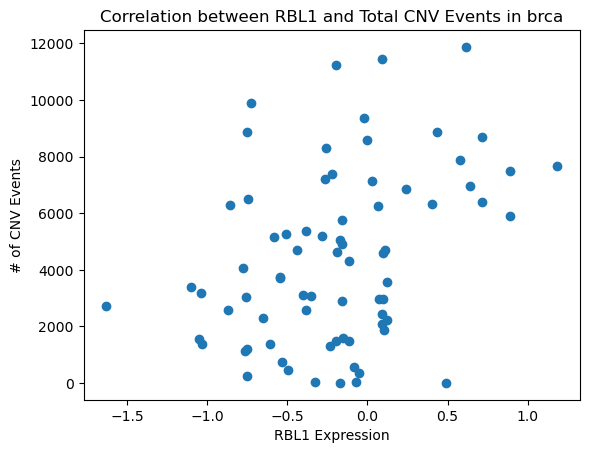

Pearsons correlation: 0.361
0.0015806847145080761
+++++++++++++++++++++++++++
No RBL1 data available for ccrcc
+++++++++++++++++++++++++++
+++++++++++++++++++++++++++
No RBL1 data available for coad
+++++++++++++++++++++++++++


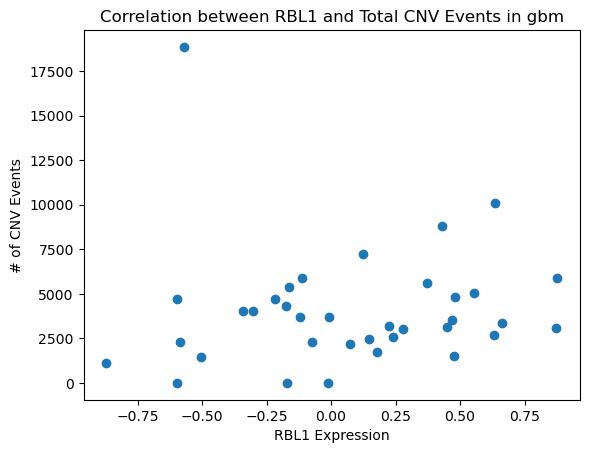

Pearsons correlation: 0.047
0.7874496655642249


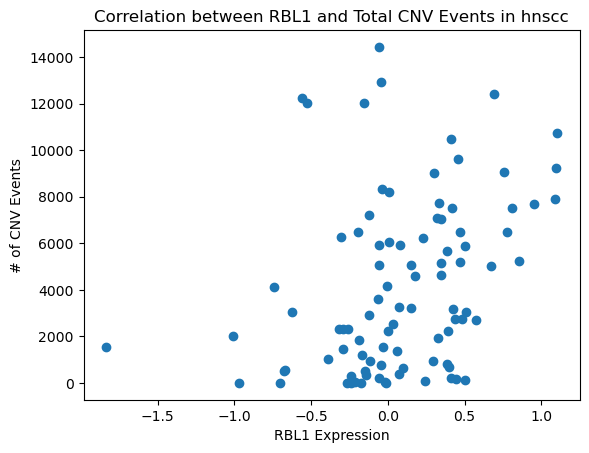

Pearsons correlation: 0.326
0.0015429288692958333


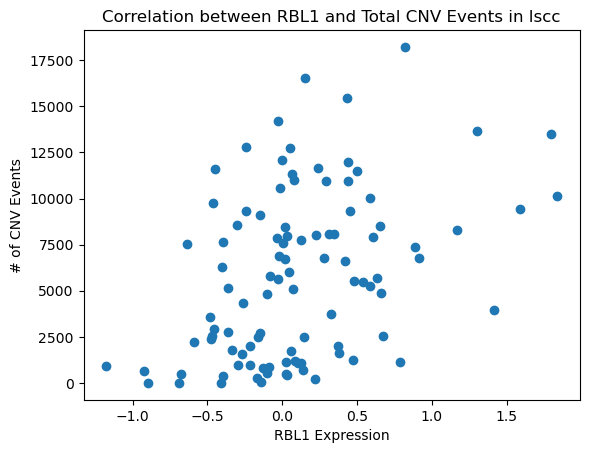

Pearsons correlation: 0.401
3.486174230871166e-05


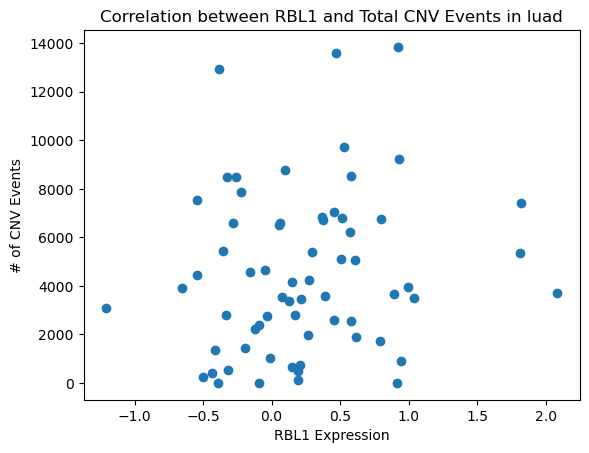

Pearsons correlation: 0.149
0.23563350070095568


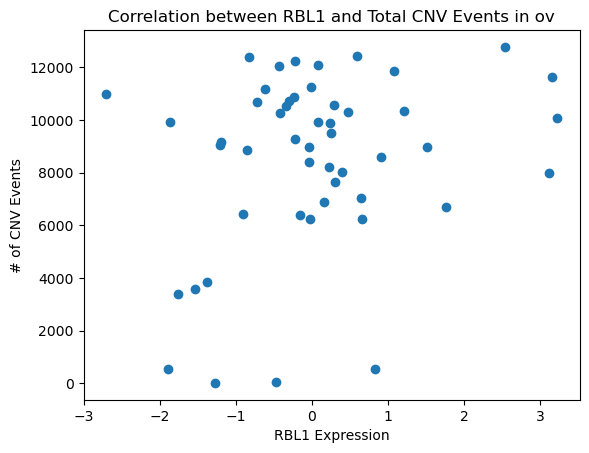

Pearsons correlation: 0.265
0.06300981942496099


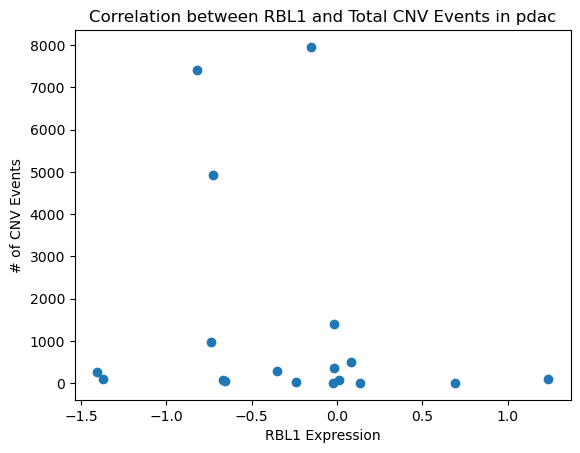

Pearsons correlation: -0.184
0.4640851822959322


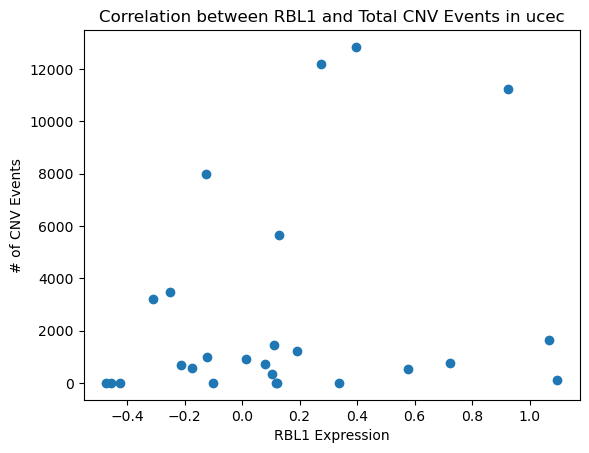

Pearsons correlation: 0.233
0.251229299575545


In [9]:
protein = 'RBL1'
for accessor in data_accessors:
    protein_clinical_dat = Get_CNV_Protein_Correlation(accessor,data_accessors[accessor],protein)

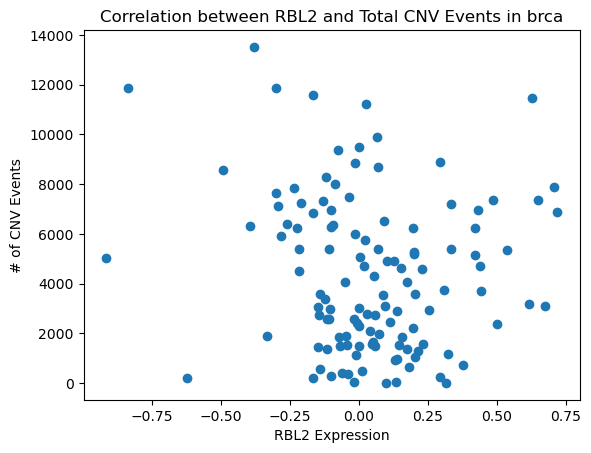

For RBL2 in brca:
Pearsons correlation: -0.122
0.18073726889550207


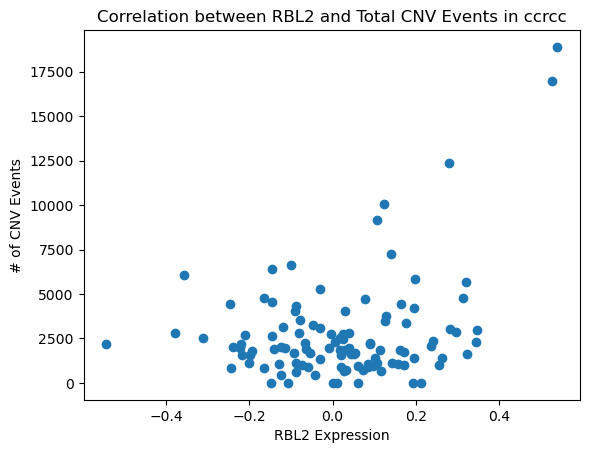

For RBL2 in ccrcc:
Pearsons correlation: 0.337
0.0003123041664391287


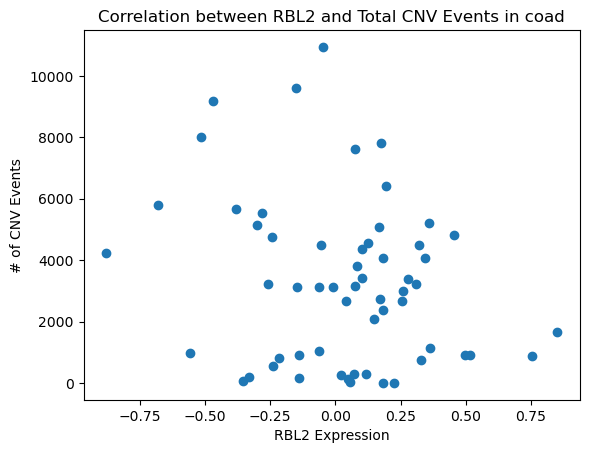

For RBL2 in coad:
Pearsons correlation: -0.231
0.08047541768386454


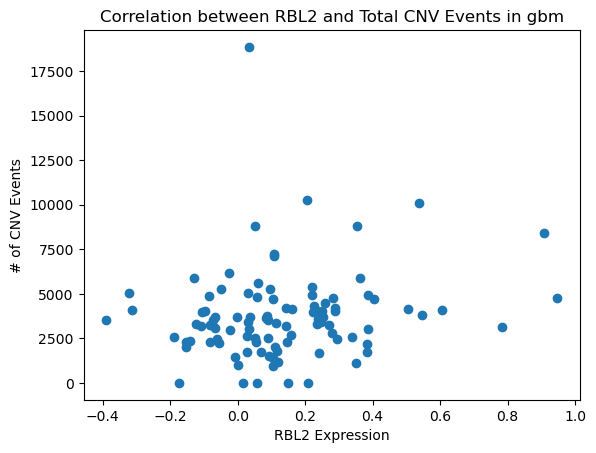

For RBL2 in gbm:
Pearsons correlation: 0.167
0.09764666168730012


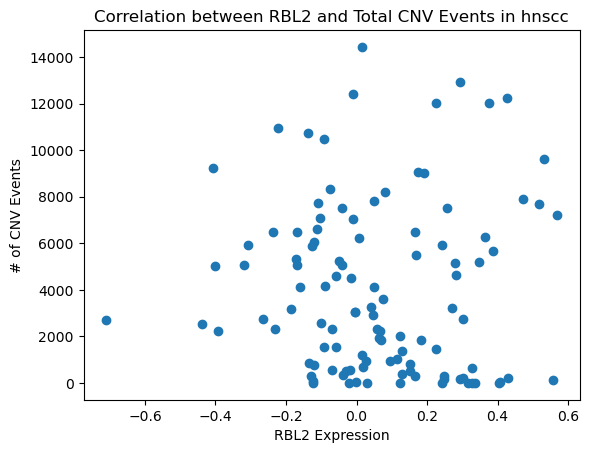

For RBL2 in hnscc:
Pearsons correlation: -0.007
0.9427691085399474


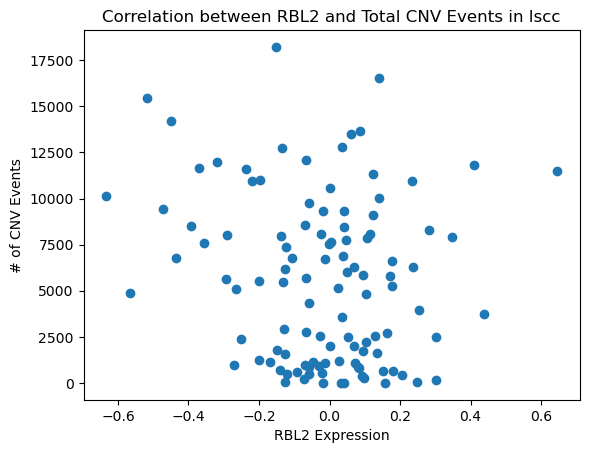

For RBL2 in lscc:
Pearsons correlation: -0.172
0.0732003660398616


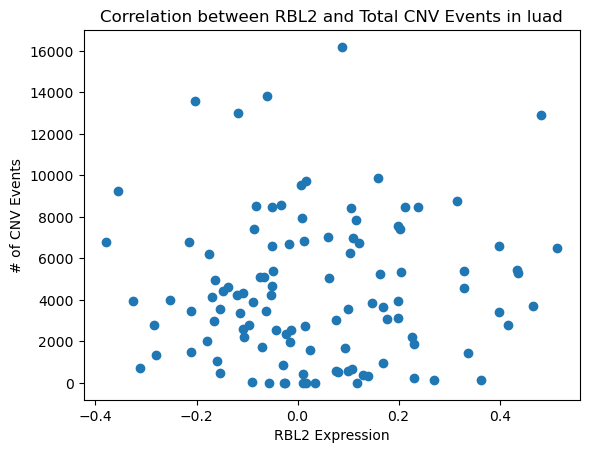

For RBL2 in luad:
Pearsons correlation: 0.042
0.6658222545155494


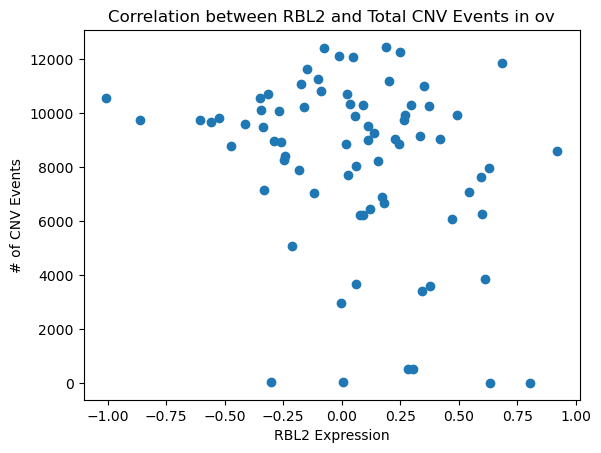

For RBL2 in ov:
Pearsons correlation: -0.280
0.015017818349660827


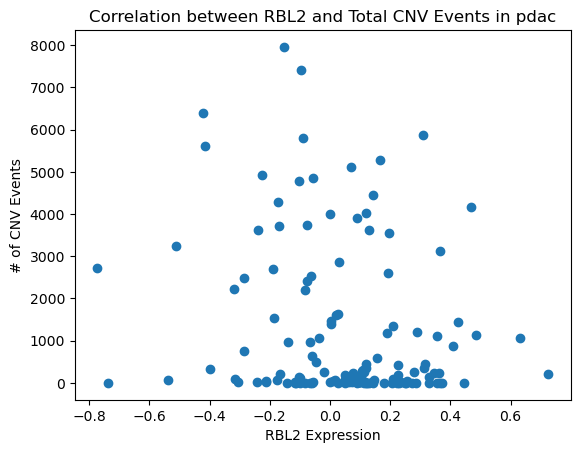

For RBL2 in pdac:
Pearsons correlation: -0.212
0.013536255431887283


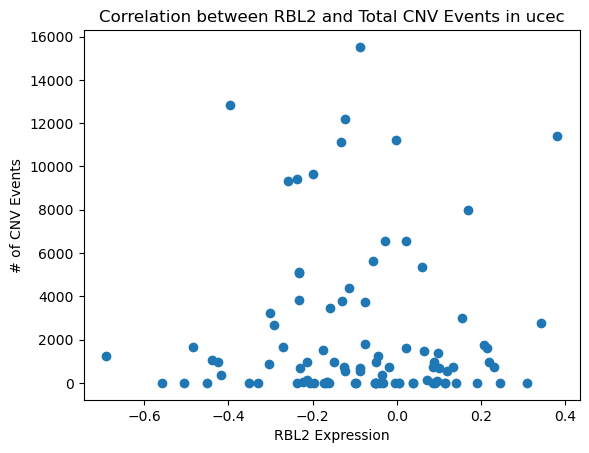

For RBL2 in ucec:
Pearsons correlation: -0.015
0.8849636293725027


In [15]:
protein = 'RBL2'
for accessor in data_accessors:
    protein_clinical_dat = Get_CNV_Protein_Correlation(accessor,data_accessors[accessor],protein)

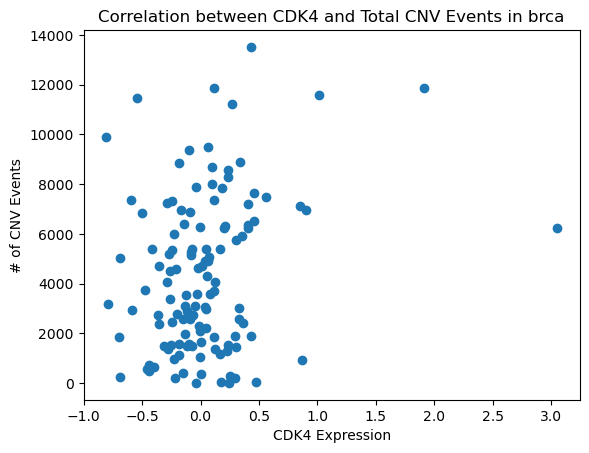

For CDK4 in brca:
Pearsons correlation: 0.243
0.007098026557129767


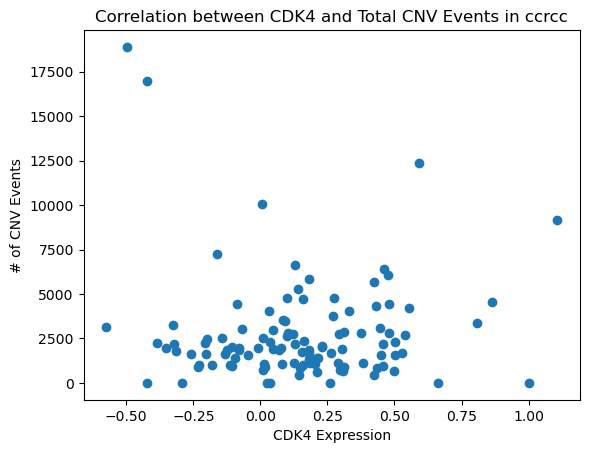

For CDK4 in ccrcc:
Pearsons correlation: -0.035
0.7142688857069042


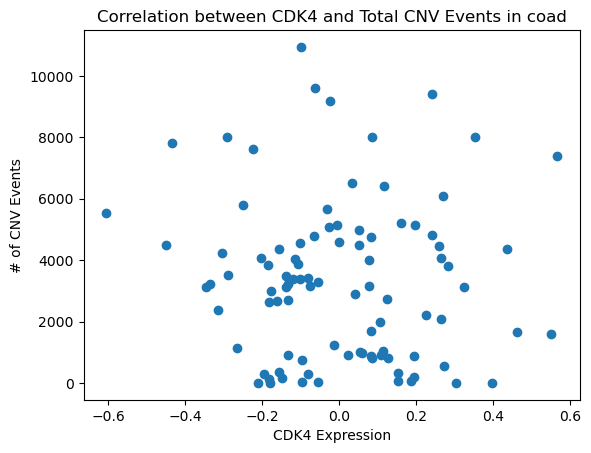

For CDK4 in coad:
Pearsons correlation: -0.071
0.4960182488370657


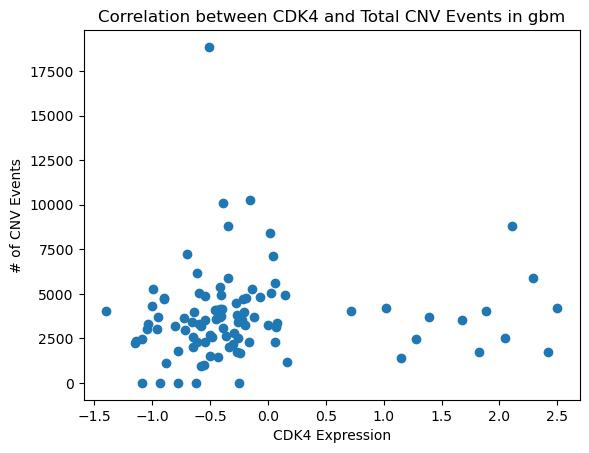

For CDK4 in gbm:
Pearsons correlation: 0.077
0.44999402432280095


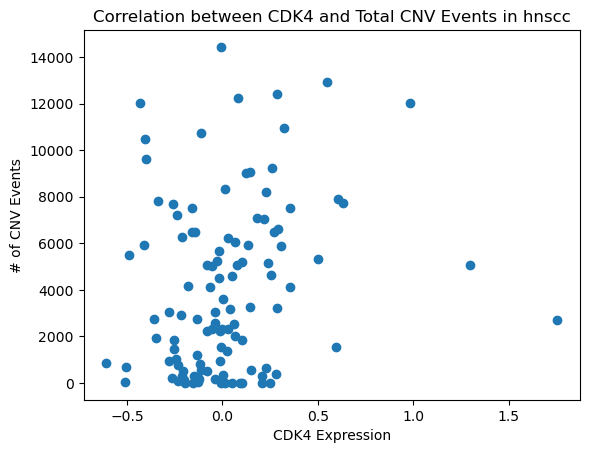

For CDK4 in hnscc:
Pearsons correlation: 0.213
0.025795573442839486


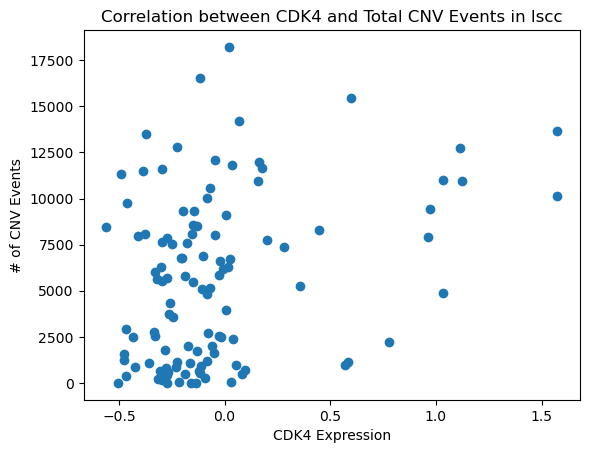

For CDK4 in lscc:
Pearsons correlation: 0.312
0.0009151608118225425


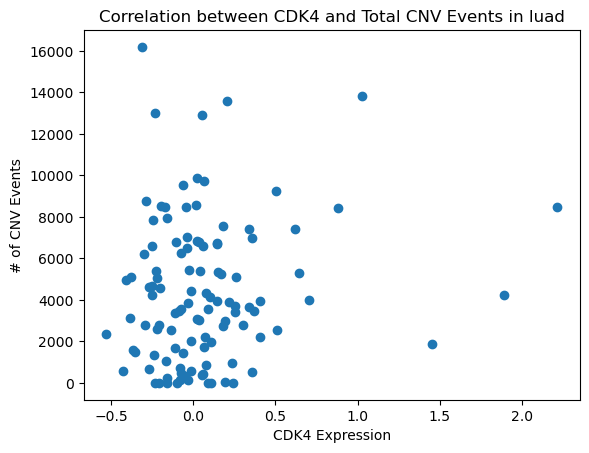

For CDK4 in luad:
Pearsons correlation: 0.136
0.15639008390818995


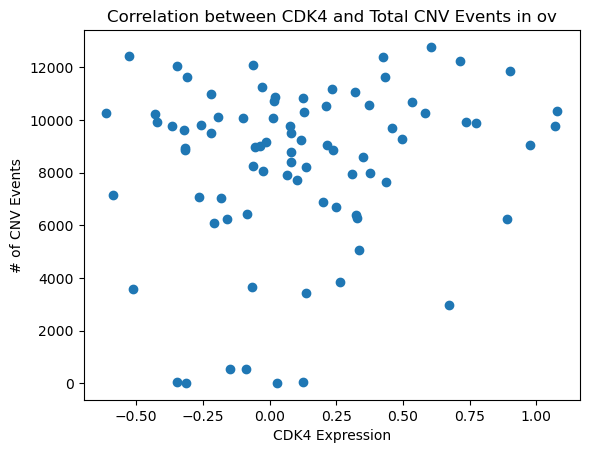

For CDK4 in ov:
Pearsons correlation: 0.157
0.1601209939124783


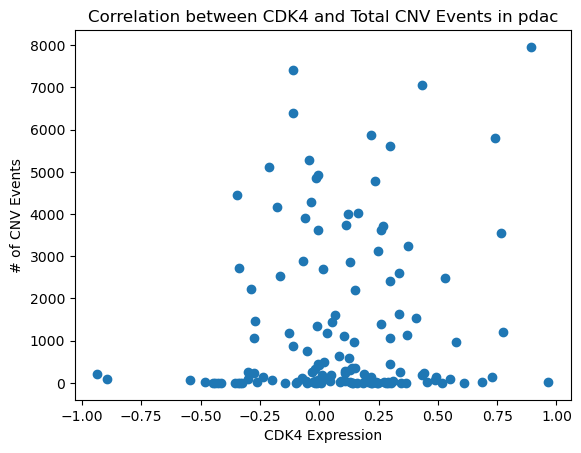

For CDK4 in pdac:
Pearsons correlation: 0.129
0.12799991802365082


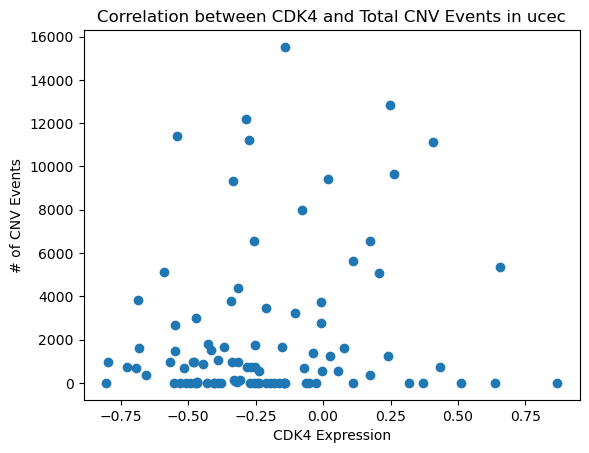

For CDK4 in ucec:
Pearsons correlation: 0.167
0.10585143065346722


In [21]:
protein = 'CDK4'
for accessor in data_accessors:
    protein_clinical_dat = Get_CNV_Protein_Correlation(accessor,data_accessors[accessor],protein)

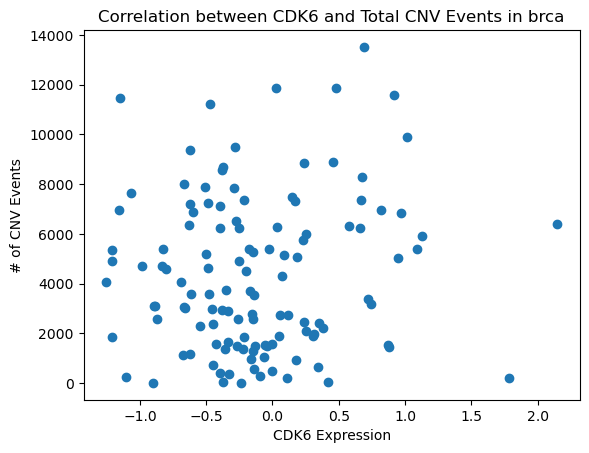

For CDK6 in brca:
Pearsons correlation: 0.095
0.29934010756036233


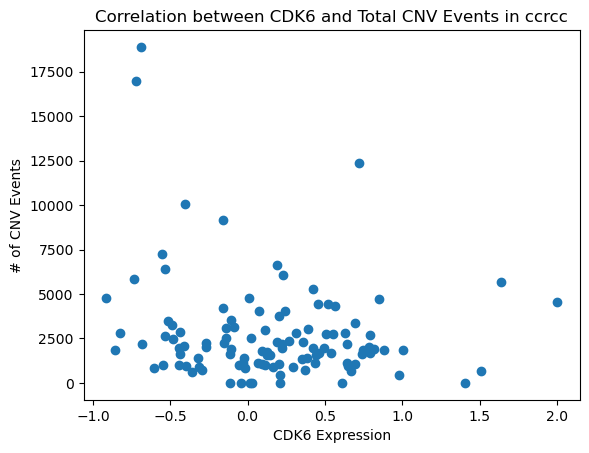

For CDK6 in ccrcc:
Pearsons correlation: -0.185
0.052780981460173966


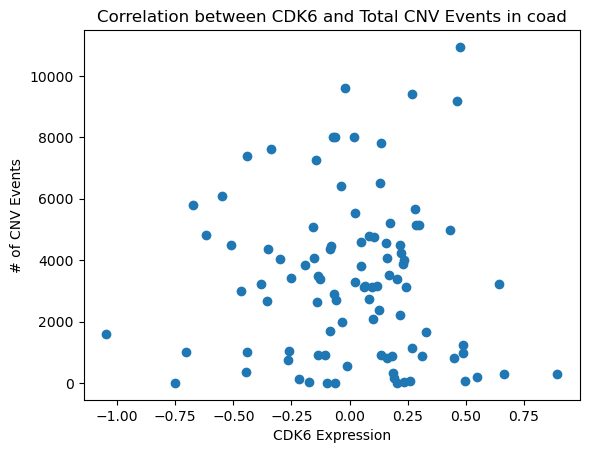

For CDK6 in coad:
Pearsons correlation: -0.040
0.6990379473737572


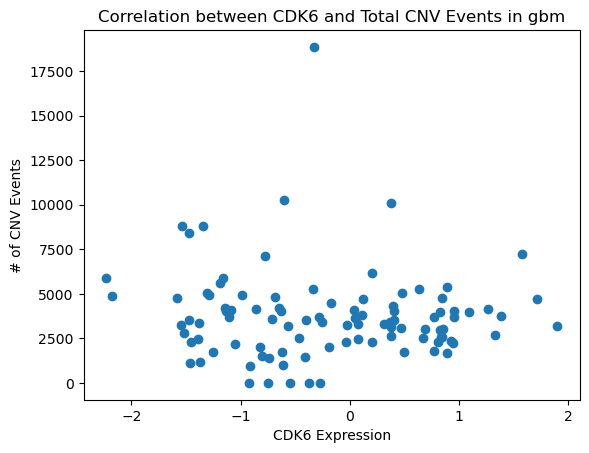

For CDK6 in gbm:
Pearsons correlation: -0.058
0.567003228939519


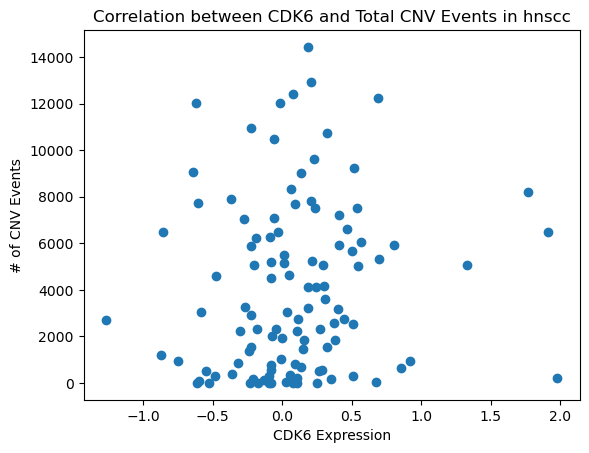

For CDK6 in hnscc:
Pearsons correlation: 0.109
0.25660312759140325


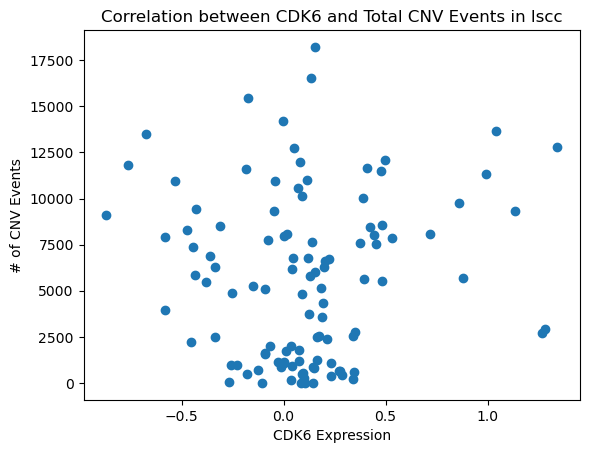

For CDK6 in lscc:
Pearsons correlation: 0.065
0.5003657605041558


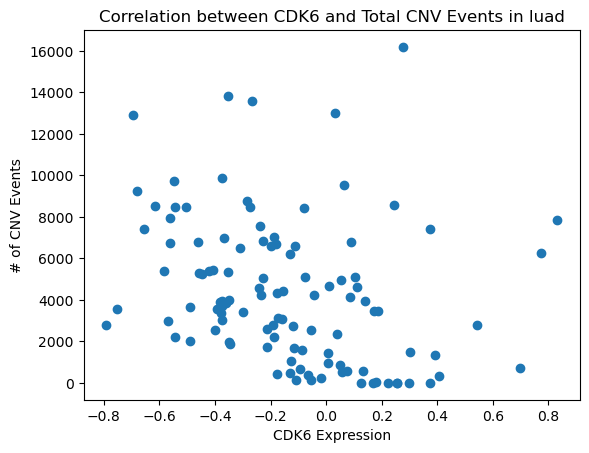

For CDK6 in luad:
Pearsons correlation: -0.276
0.0034695626446856953


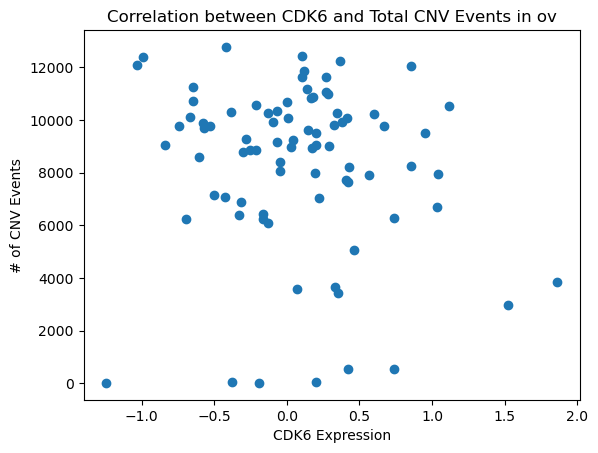

For CDK6 in ov:
Pearsons correlation: -0.139
0.21254518639063666


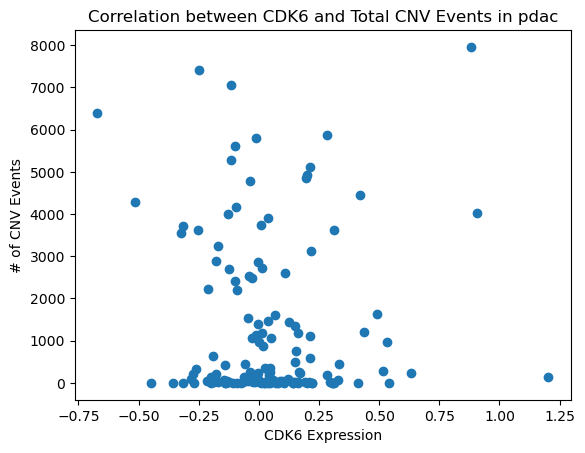

For CDK6 in pdac:
Pearsons correlation: -0.035
0.6773483647030872


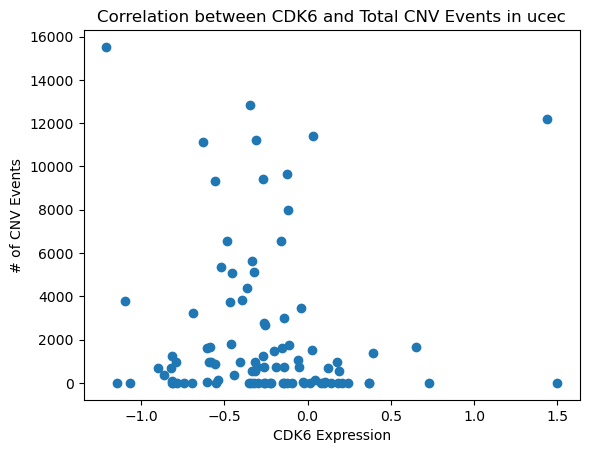

For CDK6 in ucec:
Pearsons correlation: -0.038
0.7181752857575888


In [22]:
protein = 'CDK6'
for accessor in data_accessors:
    protein_clinical_dat = Get_CNV_Protein_Correlation(accessor,data_accessors[accessor],protein)